In [1]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.io import  importer
from quetzal.model import stepmodel

% matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
training_folder = '../../'
input_folder = training_folder + r'/inputs/'

# rail

In [3]:
lines = gpd.read_file(input_folder+'sandbox/sandbox.geojson').set_index('id')
lines['geometry'] = lines['geometry'].apply(lambda g: g[0])

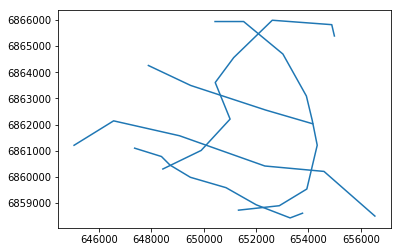

In [4]:
lines.plot()

In [5]:
links, nodes = importer.from_lines(lines, add_return=False)

In [6]:
links['route_type'] = 1
links['route_color'] = "#D22328" # rouge systra
links['time'] = 150
sm = stepmodel.StepModel(epsg=2154, coordinates_unit='meter')
sm.links, sm.nodes = links, nodes

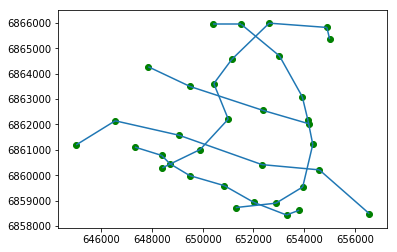

In [7]:
ax = gpd.GeoDataFrame(sm.links).plot()
plot = gpd.GeoDataFrame(sm.nodes).plot(ax=ax, color='green')

In [8]:
sm.integrity_fix_collision()

can not add prefixes on table:  footpaths


In [10]:
sm.to_zip(training_folder + r'model/preparation/sandbox.zip')

to_hdf(new file): 100%|████████████████████████████████████████████████████████████████| 26/26 [00:01<00:00, 15.22it/s]


In [10]:
s = sm.to_json_database()

to_json_database: 100%|███████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 530.56it/s]


In [11]:
print(s)

{"geojson": {"checkpoint_links": "{\"type\": \"FeatureCollection\", \"features\": [{\"id\": \"0\", \"type\": \"Feature\", \"properties\": {\"index\": 0}, \"geometry\": {\"type\": \"LineString\", \"coordinates\": [[0.0, 0.0], [0.0, 0.0]]}}]}", "loaded_links": "{\"type\": \"FeatureCollection\", \"features\": [{\"id\": \"0\", \"type\": \"Feature\", \"properties\": {\"index\": 0}, \"geometry\": {\"type\": \"LineString\", \"coordinates\": [[0.0, 0.0], [0.0, 0.0]]}}]}", "links": "{\"type\": \"FeatureCollection\", \"features\": [{\"id\": \"0\", \"type\": \"Feature\", \"properties\": {\"index\": \"link_0\", \"a\": \"node_0\", \"b\": \"node_1\", \"link_sequence\": 0, \"direction_id\": 0, \"line\": 1, \"trip_id\": \"1\", \"route_id\": \"1\", \"route_type\": 1, \"route_color\": \"#D22328\", \"time\": 150}, \"geometry\": {\"type\": \"LineString\", \"coordinates\": [[647859.3966350035, 6864268.1141236825], [649499.4188231317, 6863493.65920151]]}}, {\"id\": \"1\", \"type\": \"Feature\", \"properties